<a href="https://colab.research.google.com/github/OliviaLiu417/EmailClassfication/blob/main/vioviov_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# import all the packages needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
from google.colab import files
uploaded = files.upload()

Saving completeSpamAssassin.csv to completeSpamAssassin.csv


In [54]:
# loading the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['completeSpamAssassin.csv']))
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [4]:
# loading the dataset
#df = pd.read_csv('completeSpamAssassin.csv')
#from google.colab import drive 
#drive.mount('/content/gdrive')
#path = ('/content/gdrive/MyDrive/EmailClassfication/completeSpamAssassin.csv')
#df = pd.read_csv(path) 

Mounted at /content/gdrive



# Step 1. Data exploration and preprocessing

In [7]:
# print the basic information about the dataset for reference
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [8]:
# dropping the redudant column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [9]:
# check for number of duplicates
print("Number of duplicates: ", df.duplicated().sum())
# check for number of null values
print("Number of null values: \n", df.isnull().sum())

Number of duplicates:  752
Number of null values: 
 Body     1
Label    0
dtype: int64


In [10]:
# dropping null values
df.dropna(inplace=True)
# TODO: Remove duplicates?

In [11]:
def text_preprocessing_str(text):
    # convert  text to lowercase
    text = text.lower()
    
    # tokenize the text by creating a list of words 
    tokens = nltk.word_tokenize(text)
    
    # remove special charecters
    tokens_clean = [token for token in tokens if token.isalnum()]
    
    # remove stopwords and punctuation marks
    stop_words = set(stopwords.words('english')) 
    punctuation = set(string.punctuation)
    tokens_clean = [token for token in tokens_clean if token not in stop_words and token not in punctuation]

    # apply stemming to each word in the list
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens_clean]
        
    return " ".join(stemmed_tokens)

df['tokens_str'] = df['Body'].apply(text_preprocessing_str)
df

,Body,Label,tokens_str
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lbs 30...
...,...,...,...
6041,empty,0,empti
6042,___ ___ ...,0,insignific matter heavili overemphasis hugh mt...
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0,reader write extens search dumb messag revisit...
6044,empty,0,empti


In [13]:
def text_preprocessing(text):
    # convert  text to lowercase
    text = text.lower()
    
    # tokenize the text by creating a list of words 
    tokens = nltk.word_tokenize(text)
    
    # remove special charecters
    tokens_clean = [token for token in tokens if token.isalnum()]
    
    # remove stopwords and punctuation marks
    stop_words = set(stopwords.words('english')) 
    punctuation = set(string.punctuation)
    tokens_clean = [token for token in tokens_clean if token not in stop_words and token not in punctuation]

    # apply stemming to each word in the list
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens_clean]
        
    return stemmed_tokens

df['tokens'] = df['Body'].apply(text_preprocessing)
df

,Body,Label,tokens_str,tokens
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...,"[save, 70, life, insur, spend, life, quot, sav..."
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...,"[1, fight, risk, cancer, http, slim, guarante,..."
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...,"[1, fight, risk, cancer, http, slim, guarante,..."
3,##############################################...,1,adult club offer free membership instant acces...,"[adult, club, offer, free, membership, instant..."
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lbs 30...,"[thought, might, like, 1, slim, guarante, lose..."
...,...,...,...,...
6041,empty,0,empti,[empti]
6042,___ ___ ...,0,insignific matter heavili overemphasis hugh mt...,"[insignific, matter, heavili, overemphasis, hu..."
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0,reader write extens search dumb messag revisit...,"[reader, write, extens, search, dumb, messag, ..."
6044,empty,0,empti,[empti]


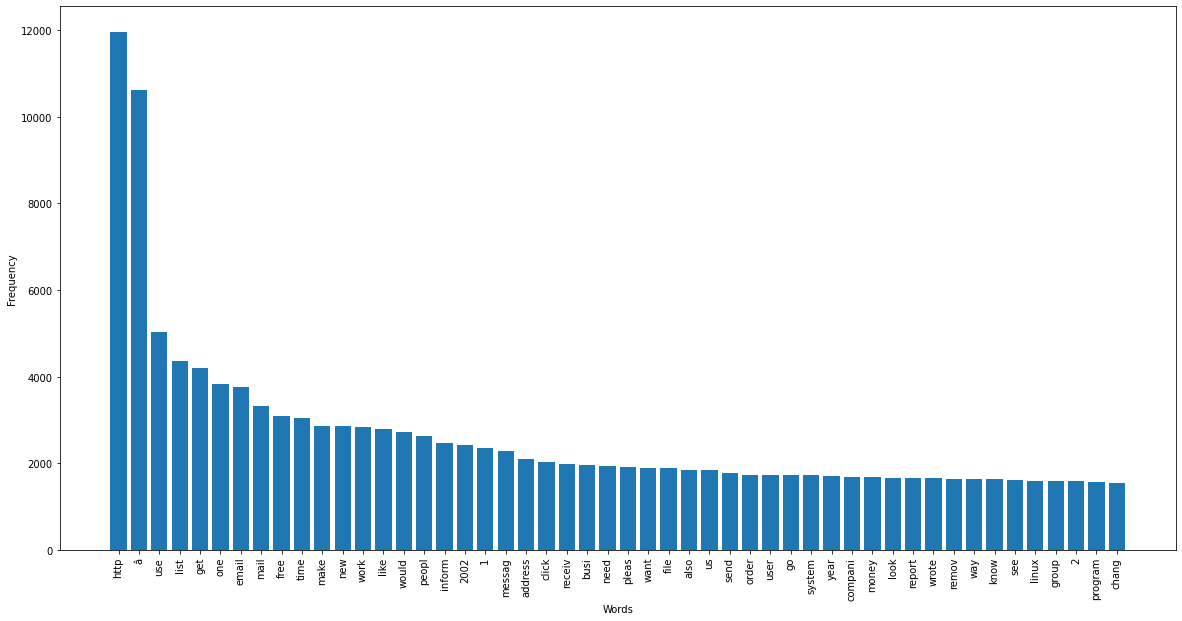

In [14]:
#TODO: Bar graphs for both spam and ham emails?
all_lists = df['tokens'];
all_tokens = [word for sample in all_lists for word in sample]

def draw_frequency(words):
  # Assuming word_freq is a dictionary containing the frequency of each word
  word_freq = Counter(words)

  # Get the 20 most common words and their frequencies
  most_common = word_freq.most_common(50)

  # Extract the words and frequencies into separate lists
  words = [pair[0] for pair in most_common]
  freqs = [pair[1] for pair in most_common]

  # Create a bar graph of the word frequencies
  plt.figure(figsize=(20, 10))
  plt.xticks(rotation='vertical')
  plt.bar(words, freqs)
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.show()
  return 

draw_frequency(all_tokens)

In [15]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)



# Setting up features and target as x and y
x = tfidf.fit_transform(df['tokens_str']).toarray()
y = df['Label'].values

In [16]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
gnb = GaussianNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [18]:
classifiers = {
    'GaussianNB' : gnb,
    'SVC' : svc,
    'LogisticRegression': lrc
}

In [19]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):
    
    classifiers.fit(x_train,y_train)
    
    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)


    return accuracy,precision
     

In [38]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name,classifier in classifiers.items():
    
  current_accuracy,current_precision = train_classifier(classifier, x_train,y_train,x_test,y_test)
    
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision,'\n')
    
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  GaussianNB
Accuracy -  0.9032258064516129
Precision -  0.817283950617284 

For  SVC
Accuracy -  0.6443341604631927
Precision -  0.43457943925233644 

For  LogisticRegression
Accuracy -  0.946236559139785
Precision -  0.8833746898263027 



In [42]:
# performance table
performance1 = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance1

,Algorithm,Accuracy,Precision
2,LogisticRegression,0.946237,0.883375
0,GaussianNB,0.903226,0.817284
1,SVC,0.644334,0.434579


In [30]:
# get the accuracy and precision result using cross-validation
k = 5
kf = KFold(n_splits=k, random_state=None)

def train_classifier_with_cv(classifiers,x,y,k):
  acc_score = []
  prec_score = []
 
  for train_index , test_index in kf.split(x):
      x_train , x_test = x[train_index,:],x[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]
     
      classifiers.fit(x_train,y_train)
      y_pred = classifiers.predict(x_test)
      accuracy = accuracy_score(y_test,y_pred)
      precision = precision_score(y_test,y_pred)
    
      acc_score.append(accuracy)
      avg_acc_score = sum(acc_score)/k
      prec_score.append(precision)
      avg_prec_score = sum(prec_score)/k

  return avg_acc_score,avg_prec_score
     

In [46]:
# storing accuracy and precision in list
accuracy_scores_cv = []
precision_scores_cv = []

# training all the models on training data
for name,classifier in classifiers.items():
    
  current_accuracy_cv,current_precision_cv = train_classifier_with_cv(classifier, x,y,5)
    
  print("For ",name)
  print("Accuracy - ",current_accuracy_cv)
  print("Precision - ",current_precision_cv,'\n')
    
  accuracy_scores_cv.append(current_accuracy_cv)
  precision_scores_cv.append(current_precision_cv)

For  GaussianNB
Accuracy -  0.8147229114971049
Precision -  0.39003690036900374 

For  SVC
Accuracy -  0.8774193548387096
Precision -  0.3965244865718799 

For  LogisticRegression
Accuracy -  0.8388751033912325
Precision -  0.3955479452054794 



In [47]:
# performance table
performance1_cv = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores_cv,'Precision':precision_scores_cv}).sort_values('Precision',ascending=False)
performance1_cv
     


,Algorithm,Accuracy,Precision
1,SVC,0.877419,0.396524
2,LogisticRegression,0.838875,0.395548
0,GaussianNB,0.814723,0.390037


In [34]:
# Using binary encoding instead of tf-idf
binary_vectorizer = TfidfVectorizer(binary=True, norm=None, use_idf=False, smooth_idf=False, lowercase=True, min_df=1, max_df=1.0, max_features=17000, ngram_range=(1,1))

# Setting up features and target as x and y
x_binary = binary_vectorizer.fit_transform(df['tokens_str']).toarray()
y_binary = df['Label'].values

In [35]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x_binary,y_binary,test_size=0.2,random_state=0)

In [36]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name,classifier in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(classifier, x_train,y_train, x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GaussianNB
Accuracy -  0.9032258064516129
Precision -  0.817283950617284 

For  SVC
Accuracy -  0.6443341604631927
Precision -  0.43457943925233644 

For  LogisticRegression
Accuracy -  0.946236559139785
Precision -  0.8833746898263027 



In [50]:
# performance table
performance2 = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance2

,Algorithm,Accuracy,Precision
2,LogisticRegression,0.946237,0.883375
0,GaussianNB,0.903226,0.817284
1,SVC,0.644334,0.434579


In [49]:
# storing accuracy and precision in list
accuracy_scores_cv = []
precision_scores_cv = []

# training all the models on training data
for name,classifier in classifiers.items():
    
    current_accuracy_cv,current_precision_cv = train_classifier_with_cv(classifier, x_binary, y_binary, k)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy_cv)
    print("Precision - ",current_precision_cv,'\n')
    
    accuracy_scores_cv.append(current_accuracy_cv)
    precision_scores_cv.append(current_precision_cv)

For  GaussianNB
Accuracy -  0.8147229114971049
Precision -  0.39003690036900374 

For  SVC
Accuracy -  0.8774193548387096
Precision -  0.3965244865718799 

For  LogisticRegression
Accuracy -  0.8388751033912325
Precision -  0.3955479452054794 



In [51]:
# performance table
performance2_cv = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores_cv,'Precision':precision_scores_cv}).sort_values('Precision',ascending=False)
performance2_cv
     

,Algorithm,Accuracy,Precision
1,SVC,0.877419,0.396524
2,LogisticRegression,0.838875,0.395548
0,GaussianNB,0.814723,0.390037
